In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List,Dict
import os
import json
import re
import statistics
from transformers import AutoTokenizer
from util_statistics import human_written_files, machine_generated_files, \
                    OS_PATH_MACHINE_GENERATED_TRAININGDATA_LLAMA, \
                    OS_PATH_HUMAN_WRITTEN_CLEANED, \
                    FILENAME_TOKENLENGTH_DICT_HW, \
                    FILENAME_TOKENLENGTH_DICT_MG_LLAMA, \
                    OS_PATH_STATISTICS_OUTPUT

NUM_GENRES = 5

In [2]:
# just take bert tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [3]:

def extract_as_string(input_string: str)-> str:
    
    pattern = r'llama_text[\'"]: [\'"](.*?)[\'"], [\'"]gen_text_len[\'"]:'

    # Use re.search to find the first match
    match = re.search(pattern, input_string)

    # Check if a match is found
    if match:
        # Extract the content between 'llama_generated: ' and ', 'gen_text_len':'
        extracted_text = match.group(1)
        #print("Extracted text:", extracted_text)
        try:
            extracted_text = extracted_text.encode('latin-1').decode('utf-8')
            #print(extracted_text[:10])
        except:
            num_fail = os.environ.get('NUMBER_FAILURES','0')
            os.environ['NUMBER_FAILURES'] = str(int(num_fail)+1)
            return None
    else:
        # No match found. ERROR! LLaMA sometimes wrote down stuff a bit weird...
        num_fail = os.environ.get('NUMBER_FAILURES','0')
        os.environ['NUMBER_FAILURES'] = str(int(num_fail)+1)
        return None
    
    pattern2 = r'\{[\'"]prompt[\'"]: [\'"](.*?)[\'"], [\'"]llama_text[\'"]: [\'"]'
    extracted_text_no_prompt = re.sub(pattern2, '', extracted_text)
    #print("Extracted text:", extracted_text_no_prompt)
    return extracted_text_no_prompt

In [4]:
def get_token_len_dict(list_of_files: List[str], PATH: str, generated: bool) -> Dict[str, Dict[str, int]]:
    token_lens_dict = {}
    for file_name in list_of_files:
        input_path = os.path.join(
            PATH,
            file_name
        )

        key = f"token_lens_{file_name}"
        token_lens = {}
        token_lens_dict[key] = token_lens

        if not generated:
            encoding='utf-8'
        else:
            encoding='latin-1'

        with open(input_path, 'r',encoding=encoding) as input:
            for i, line in enumerate(input, start=1):
                text = None
                taz_flag = 0
                try:
                    obj = json.loads(line[:-2]) # do not load the comma +\n that scrapy adds by default
                except:
                    try:
                        obj = json.loads(line[:-1]) # probably last line
                    except: # this is taz case, latin-1 but confused llama outputs
                        try:
                            text = extract_as_string(line)
                            if text is None:
                                continue
                            else: 
                                taz_flag = 1
                        except: continue

                
                if generated:
                    if not taz_flag:
                        text = obj.get("llama_text", None) # all files have "llama_text" key  
                    else:
                        text = extract_as_string(line)
                        if len(text) <10:
                            print(i)               
                elif not generated:
                    text = obj.get("text", None)
                
                tokens = tokenizer.tokenize(text.strip())
                token_count = len(tokens)
                token_lens[i] = token_count

        token_lens_dict[key] = token_lens
        print("\nSuccessfully extracted ", key ," from ", input_path)
    print("\nSuccessfully extracted all length from ", PATH)
    return token_lens_dict

In [6]:
## ONLY EXECUTE ONCE
# token_lens_dict_hw = {}
# token_lens_dict_hw = get_token_len_dict(human_written_files,
#                                         OS_PATH_HUMAN_WRITTEN_CLEANED,
#                                         generated=0)
# token_lens_dict_mg = {}
# token_lens_dict_mg = get_token_len_dict(machine_generated_files, 
#                                         OS_PATH_MACHINE_GENERATED_TRAININGDATA_LLAMA,
#                                         generated=1)

In [7]:

def save_dicts_tokenlength(out_path_name: str, out_file_name: str, data: Dict[str, Dict[str, int]])-> None:
    # File path to save the JSON file
    out_path_obj= os.path.join(
        out_path_name,
        out_file_name
    )
    # Save the dictionary as a JSON file
    with open(out_path_obj, "w") as out_file_obj:
        json.dump(data, out_file_obj, indent=4)

    return None

In [ ]:
## ONLY EXECUTE ONCE
# save_dicts_tokenlength(OS_PATH_STATISTICS_OUTPUT,
#                        FILENAME_TOKENLENGTH_DICT_HW,
#                        token_lens_dict_hw
#                        )
# save_dicts_tokenlength(OS_PATH_STATISTICS_OUTPUT,
#                        FILENAME_TOKENLENGTH_DICT_MG_LLAMA,
#                        token_lens_dict_mg
#                        )

In [ ]:
# load jsons
hw_path_object = os.path.join(
    OS_PATH_STATISTICS_OUTPUT,
    FILENAME_TOKENLENGTH_DICT_HW
)
with open(hw_path_object, 'r') as hw_file:
    token_lens_dict_hw = json.load(hw_file)

mg_path_object = os.path.join(
    OS_PATH_STATISTICS_OUTPUT,
    FILENAME_TOKENLENGTH_DICT_MG_LLAMA
)
with open(mg_path_object, 'r') as mg_file:
    token_lens_dict_mg = json.load(mg_file)

In [ ]:
token_lens_dict_hw

{'token_lens_output_springernature.jsonl': {'1': 185,
  '2': 309,
  '3': 375,
  '4': 128,
  '5': 258,
  '6': 90,
  '7': 123,
  '8': 220,
  '9': 148,
  '10': 100,
  '11': 348,
  '12': 258,
  '13': 270,
  '14': 226,
  '15': 389,
  '16': 247,
  '17': 224,
  '18': 188,
  '19': 341,
  '20': 410,
  '21': 251,
  '22': 274,
  '23': 775,
  '24': 227,
  '25': 275,
  '26': 191,
  '27': 126,
  '28': 127,
  '29': 236,
  '30': 180,
  '31': 353,
  '32': 71,
  '33': 142,
  '34': 378,
  '35': 45,
  '36': 260,
  '37': 469,
  '38': 315,
  '39': 254,
  '40': 91,
  '41': 223,
  '42': 180,
  '43': 243,
  '44': 191,
  '45': 95,
  '46': 211,
  '47': 100,
  '48': 112,
  '49': 533,
  '50': 310,
  '51': 188,
  '52': 221,
  '53': 180,
  '54': 249,
  '55': 380,
  '56': 105,
  '57': 131,
  '58': 293,
  '59': 166,
  '60': 436,
  '61': 187,
  '62': 234,
  '63': 184,
  '64': 181,
  '65': 556,
  '66': 285,
  '67': 185,
  '68': 271,
  '69': 78,
  '70': 520,
  '71': 308,
  '72': 552,
  '73': 381,
  '74': 341,
  '75': 92,

In [ ]:
def plot_data(token_lens_dict, class_string):
    # Create a list of colors for each list
    colors = sns.color_palette("husl", len(token_lens_dict))
    labels = ["Springer-Nature","TAZ","Wikimedia","Wikipedia","Zeit-Online"]
    #print("Colors: ",colors)

    new_dict_with_lists = {}
    for i, (filename_key, key_value_dict) in enumerate(token_lens_dict.items()):
        ## count all values without their keys to a list
        values = []
        for _key,value in key_value_dict.items():
            values += [value]
        new_dict_with_lists[filename_key] = values

    plt.figure(figsize=(12, 6)) 
    for i, (key, values) in enumerate(new_dict_with_lists.items()):

        # Ensure values are lists
        if not isinstance(values, list):
            values = [values]

        # Convert text lengths to integers
        token_lens_int = [int(token_len) for token_len in values]
        token_lens_int = [int(token_len) for token_len in token_lens_int if int(token_len) < 20000]
        # Calculate quartiles
        token_len_quartiles = np.percentile(token_lens_int, [25, 50, 75])
        print(f"The quartile values for {labels[i]}: ", token_len_quartiles)
        print(f"The standard deviation for {labels[i]} is: ", statistics.stdev(token_lens_int))

        # Create KDE plot using seaborn
        
        sns.kdeplot(token_lens_int, fill=True, label=f'{labels[i]} Curve', color=colors[i],bw_adjust=1)

        # Add vertical lines for quartiles
        for quartile in token_len_quartiles:
            plt.axvline(quartile, color=colors[i], linestyle='--', linewidth=1, label=f'{labels[i]} Q{token_len_quartiles.tolist().index(quartile) + 1}')

            #plt.axvline(quartile, color=colors[i], linestyle='--', linewidth=1, label=f'{labels[i]} Q{np.percentile(values, [25, 50, 75]).tolist().index(quartile) + 1}')

    # Stretching the x-axis
    plt.xlim(-250, 4000) 

    # Add labels and title
    plt.xlabel('Token Length')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate of {class_string} Tokens per Genre')

    # Show legend
    plt.legend()


    plt.savefig(f'output/plots/kdeplot {class_string}.png')
    # Show the plot
    #plt.show()


    # Plotting box plots
    fig, ax = plt.subplots()
    box = sns.boxplot(data=list(new_dict_with_lists.values()), showfliers=False, palette=colors)

    # Adding quartiles
    for i, (label, values) in enumerate(new_dict_with_lists.items()):
        quartiles = [25, 50, 75]
        quartile_values = [round(np.percentile(values, q), 2) for q in quartiles]
        color = colors[i]
        for q, val in zip(quartiles, quartile_values):
            ax.text(i, val, f'Q{q}', ha='center', va='bottom', color=color)

    # Customize the plot as needed
    ax.set_xticklabels(labels)#new_dict_with_lists.keys())
    ax.set_ylabel('Token Length')
    ax.set_title(f'Distribution of {class_string} Tokens per Genre with Quartiles')

    #plt.savefig(f'boxplot {class_string}.png')
    # Show the plot
    #plt.show()

The quartile values for Springer-Nature:  [134. 221. 345.]
The standard deviation for Springer-Nature is:  191.4252720268936
The quartile values for TAZ:  [ 193.  486. 1012.]
The standard deviation for TAZ is:  765.3136462596938
The quartile values for Wikimedia:  [ 417.  666. 1076.]
The standard deviation for Wikimedia is:  1327.0229759926096
The quartile values for Wikipedia:  [ 231.  527. 1023.]
The standard deviation for Wikipedia is:  1790.431524853355
The quartile values for Zeit-Online:  [ 85. 166. 300.]
The standard deviation for Zeit-Online is:  171.78923011211506


/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categoric

The quartile values for Springer-Nature:  [105. 174. 267.]
The standard deviation for Springer-Nature is:  138.17831291089604
The quartile values for TAZ:  [ 210.  674. 1214.]
The standard deviation for TAZ is:  903.4149562341706
The quartile values for Wikimedia:  [102. 394. 816.]
The standard deviation for Wikimedia is:  562.4004826430424
The quartile values for Wikipedia:  [ 93.   290.   718.75]
The standard deviation for Wikipedia is:  596.4477006990517
The quartile values for Zeit-Online:  [ 45. 125. 265.]
The standard deviation for Zeit-Online is:  224.75817292769997


/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categoric

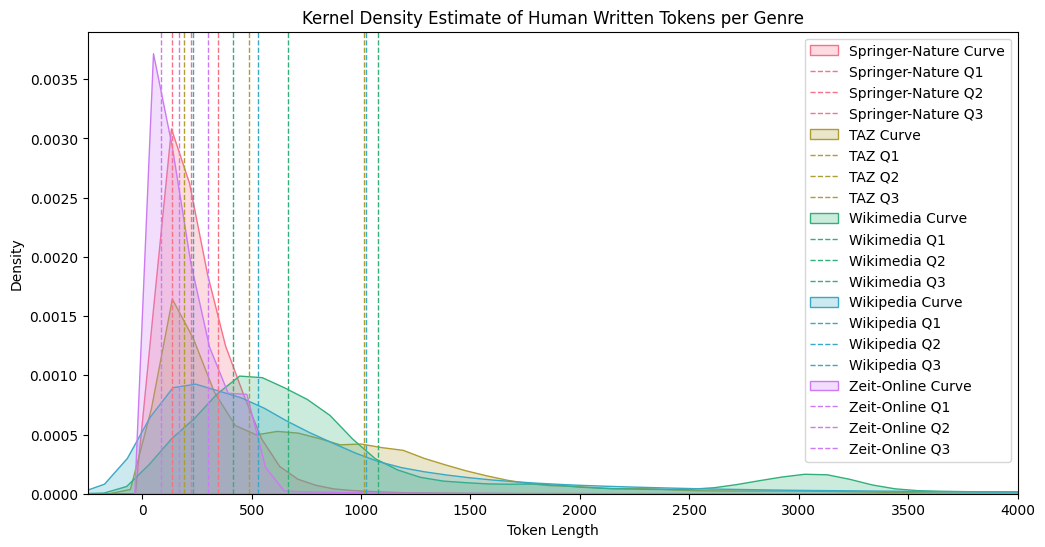

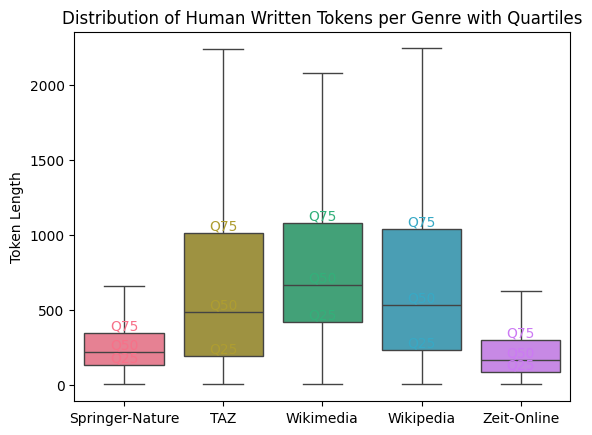

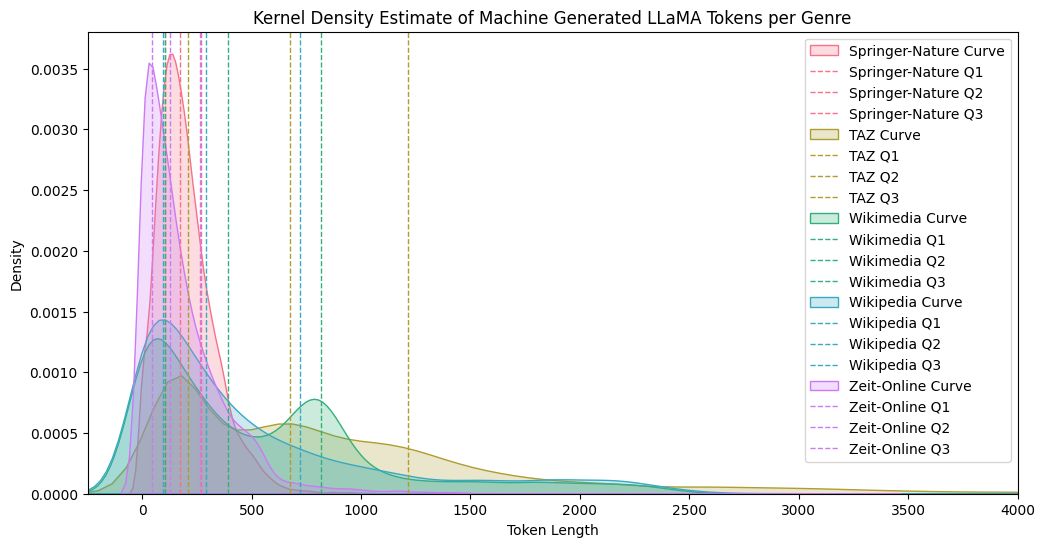

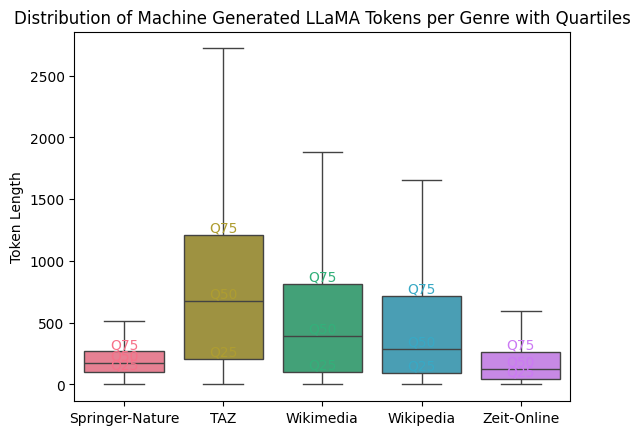

In [ ]:
plot_data(token_lens_dict_hw,"Human Written")
plot_data(token_lens_dict_mg,"Machine Generated LLaMA")
    
    